## 1: IMPORT LIBRARIES AND DATASET

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# read the csv file 
admission_df = pd.read_csv('Admission_Predict.csv')

In [12]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
# Let's drop the serial no.
admission_df = admission_df.drop(['Serial No.'], axis = 1)

## 2: PERFORM EXPLORATORY DATA ANALYSIS

In [13]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [14]:
# Grouping by University ranking 
df_university = admission_df.groupby(by = 'University Rating').mean()

In [15]:
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


## 3: PERFORM DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BE6091E20>,
      dtype=object)

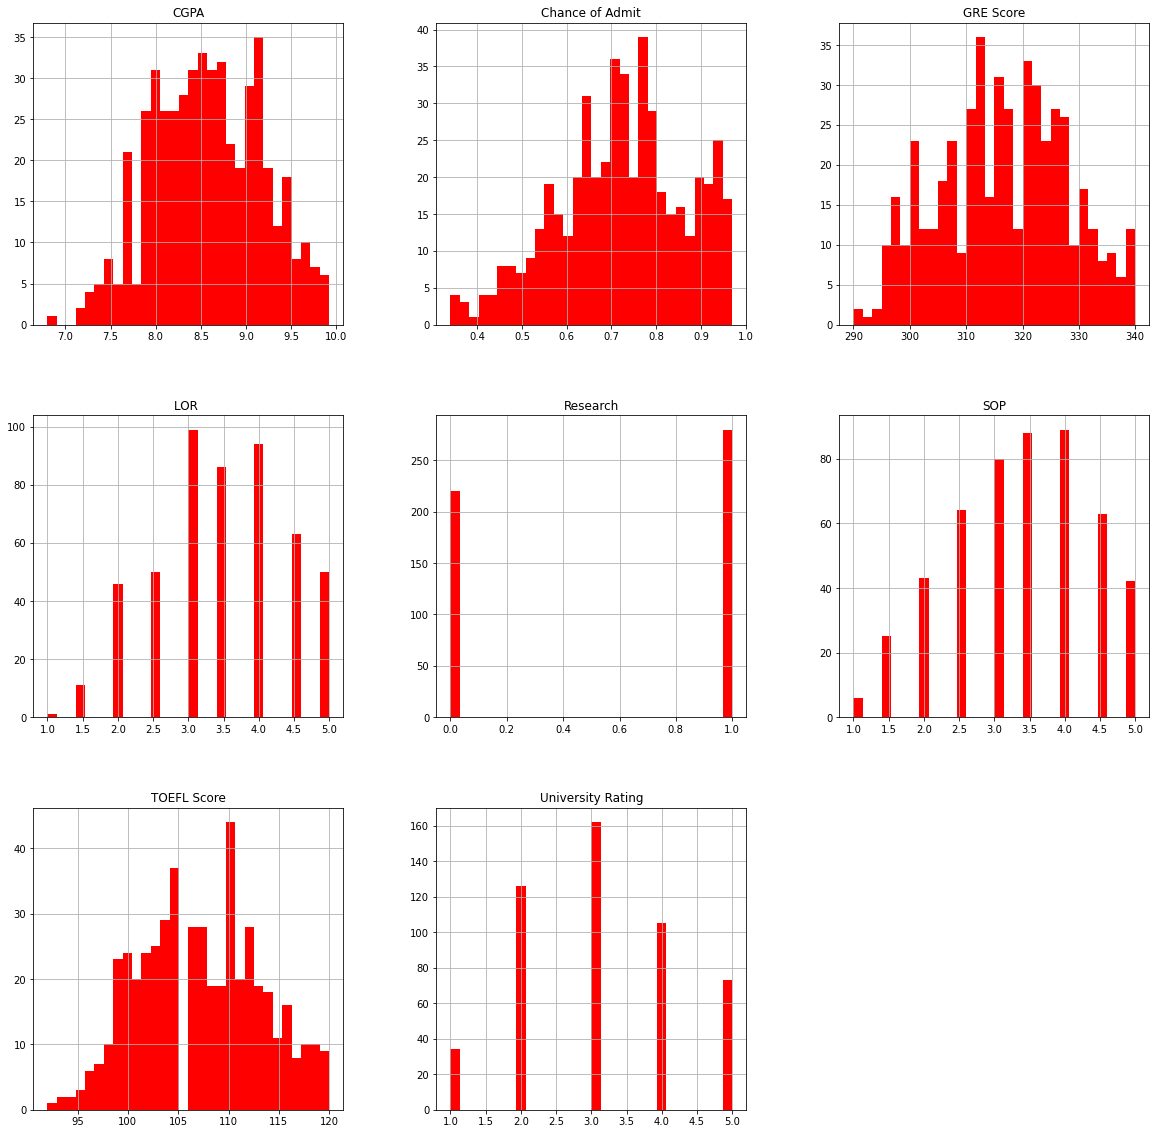

In [16]:
 admission_df.hist(bins = 30, figsize = (20, 20), color = 'r')

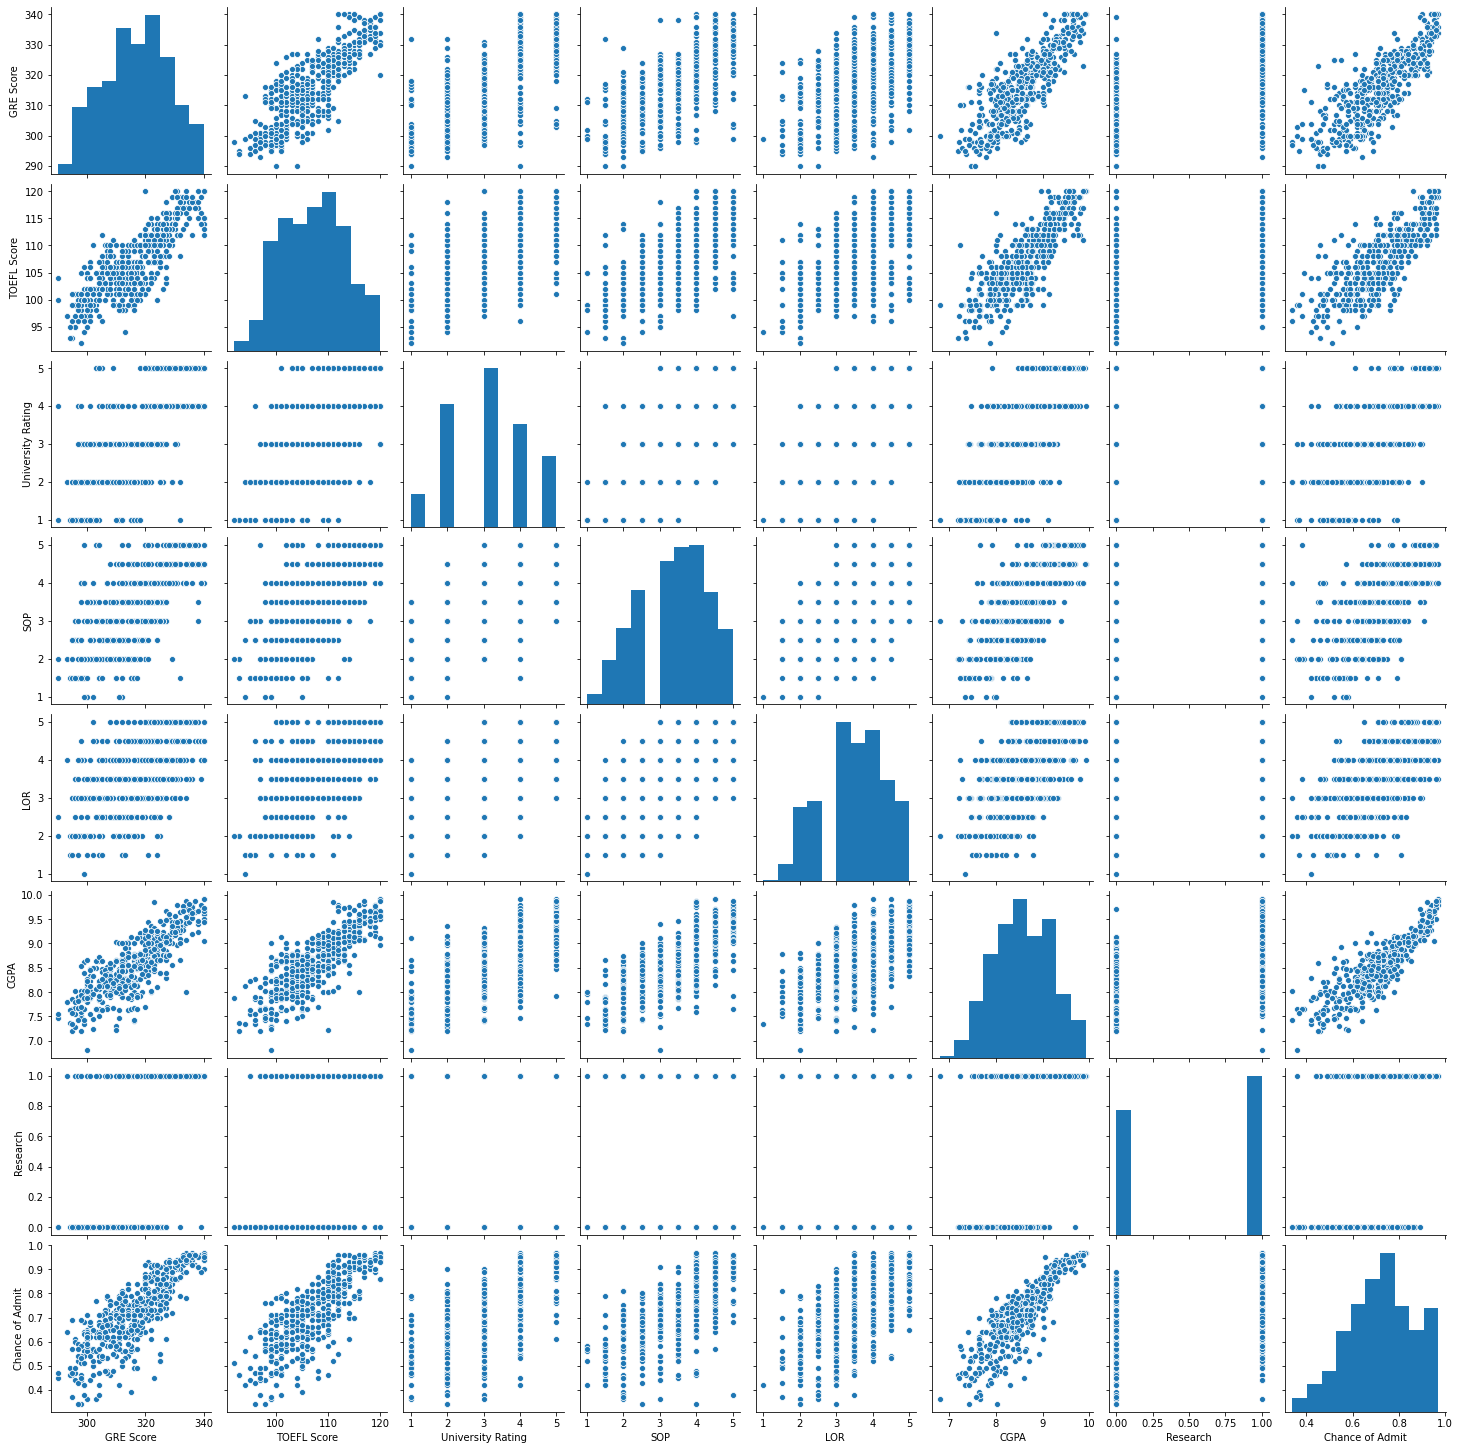

In [17]:
sns.pairplot(admission_df)

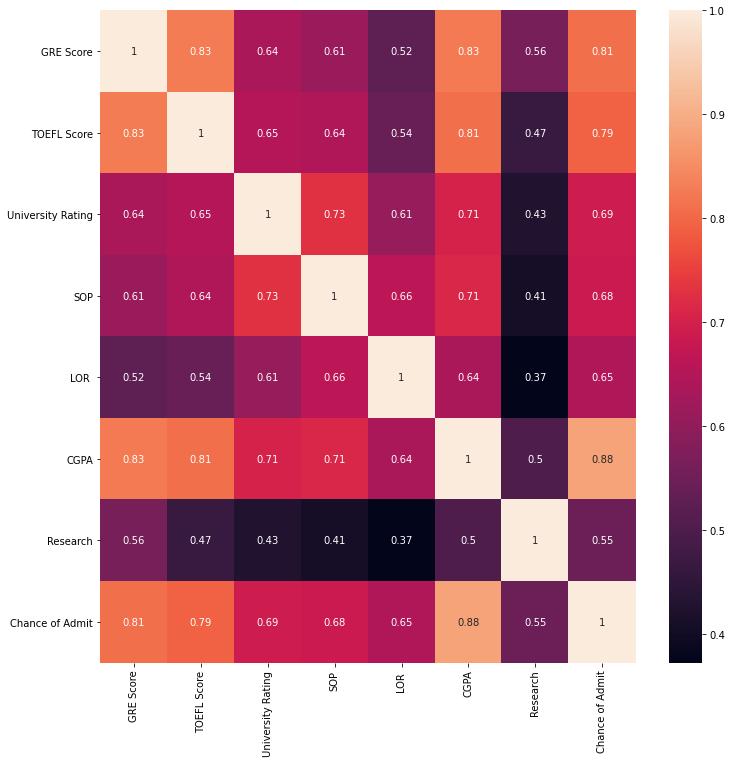

In [18]:
 
corr_matrix = admission_df.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

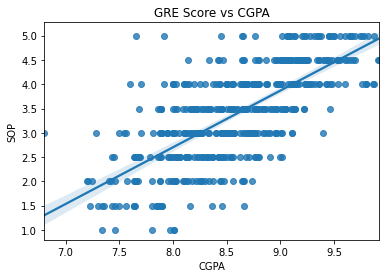

In [23]:
fig = sns.regplot(x="CGPA", y="SOP", data=admission_df)
plt.title("GRE Score vs CGPA")
plt.show()

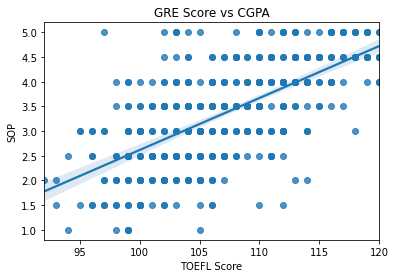

In [25]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=admission_df)
plt.title("GRE Score vs CGPA")
plt.show()

## 4: CREATE TRAINING AND TESTING DATASET

In [26]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [27]:
X = admission_df.drop(columns = ['Chance of Admit'])

In [28]:
y = admission_df['Chance of Admit']

In [29]:
X.shape

(500, 7)

In [30]:
X = np.array(X)
y = np.array(y)

In [32]:
y = y.reshape(-1,1)
y.shape

(500, 1)

In [36]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [38]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

## 5: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

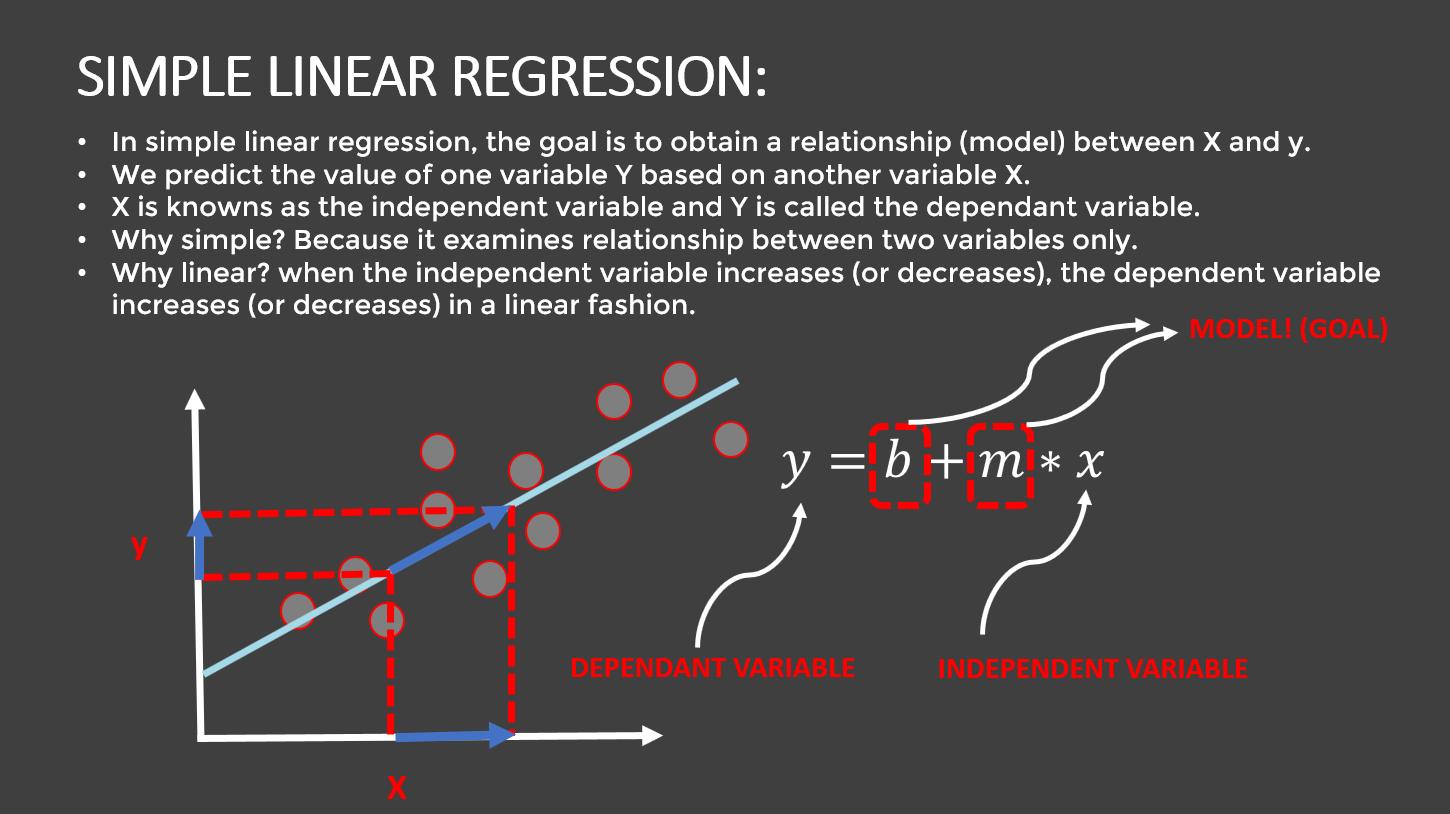

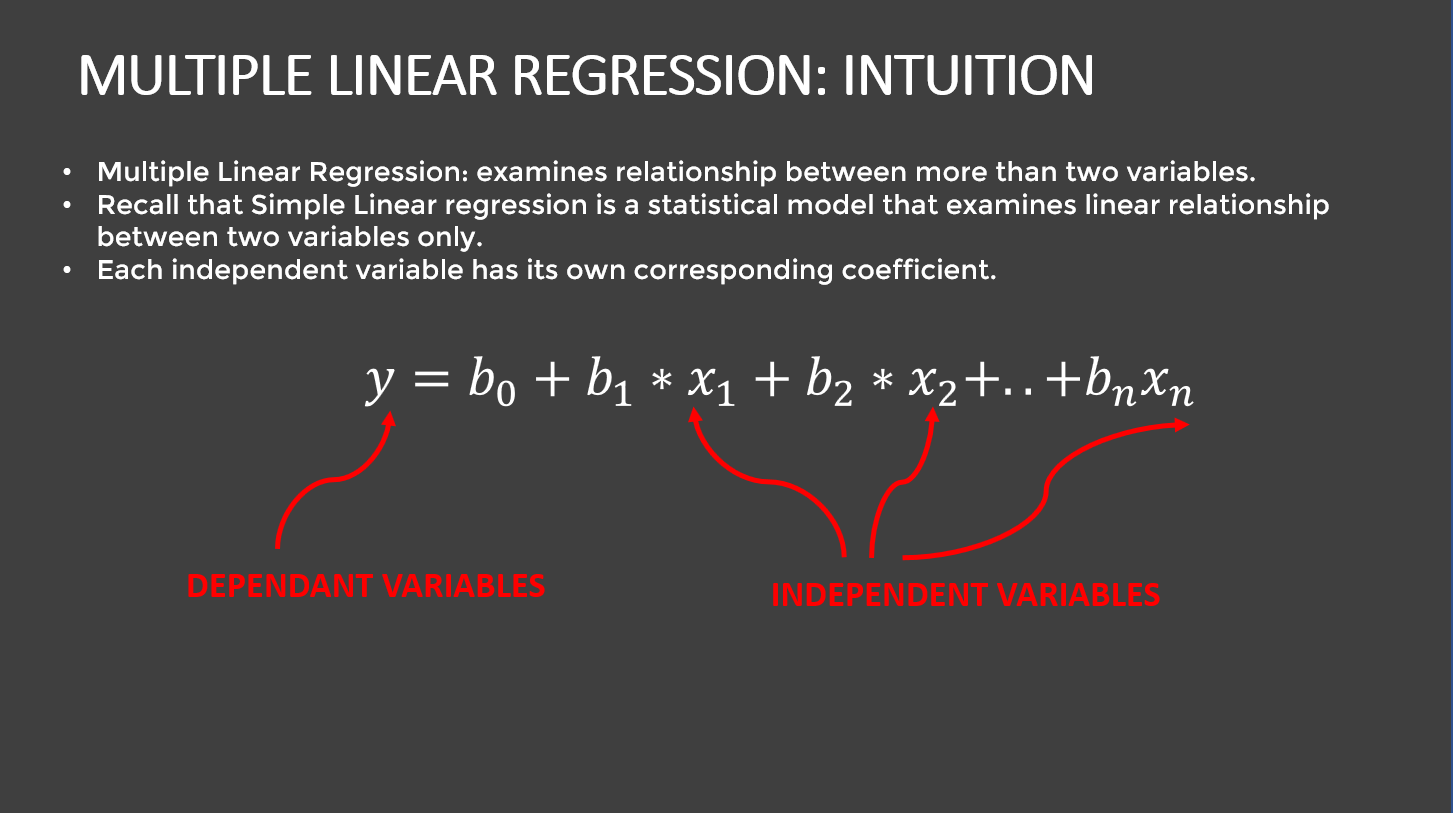

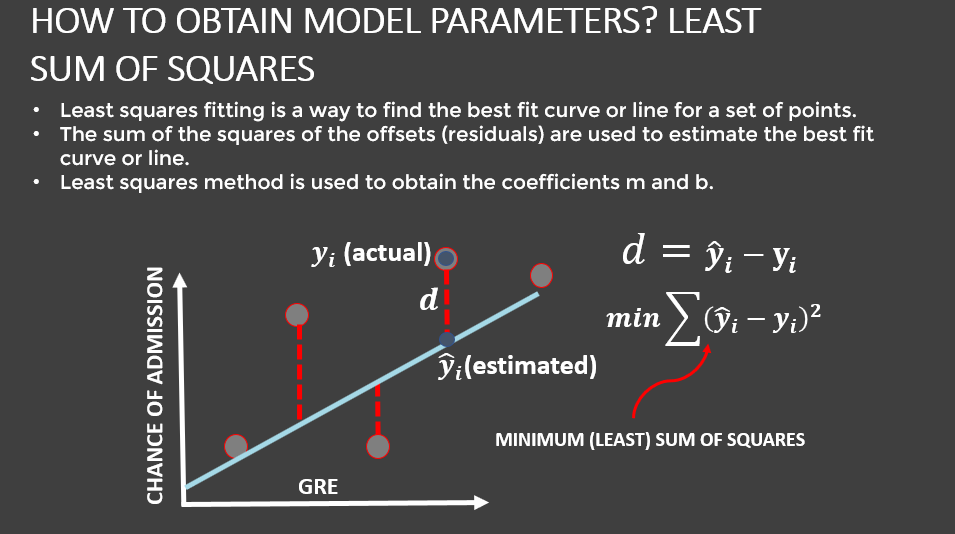

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [41]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [42]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.795970795592809

## 6: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

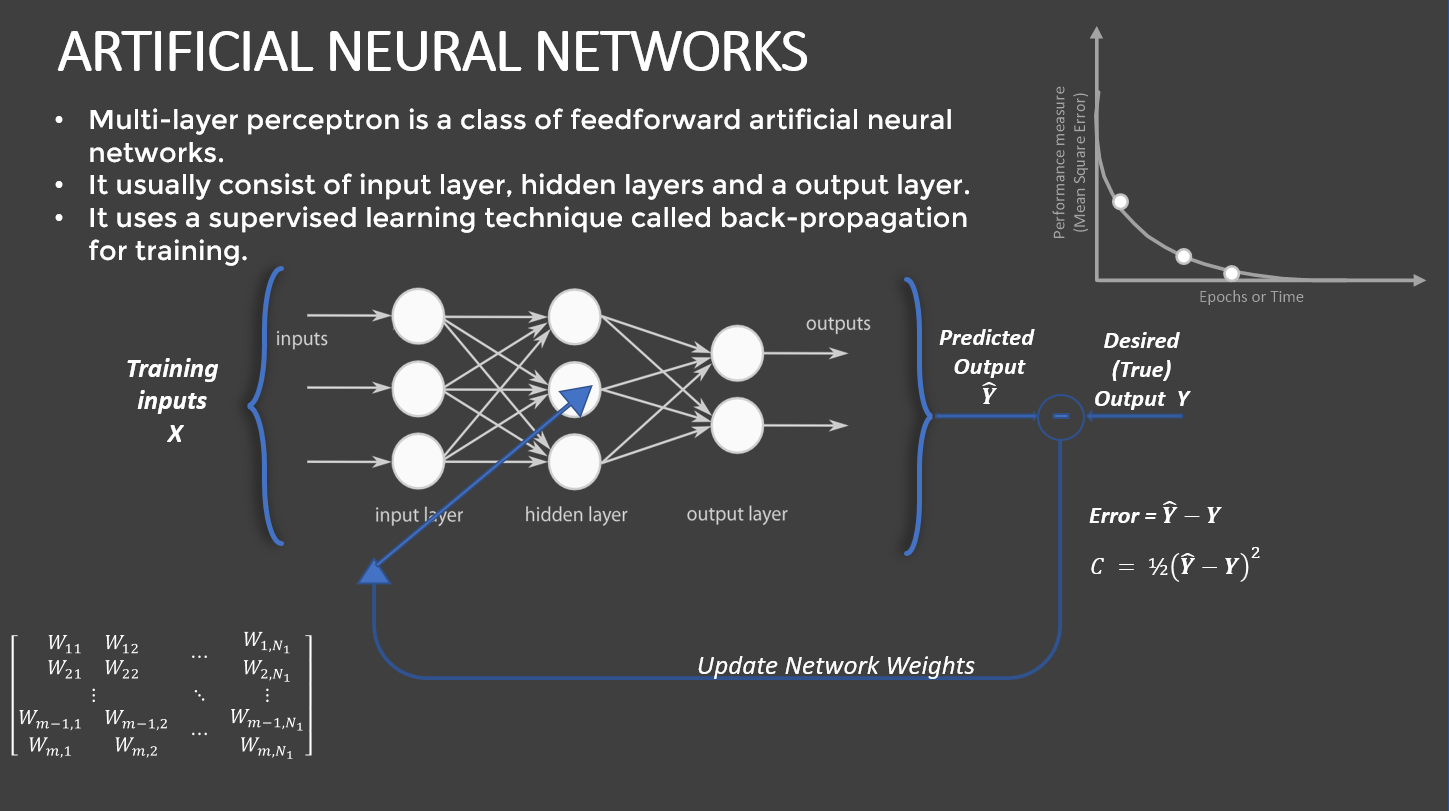

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [44]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [45]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [46]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 10ms/step - loss: 0.5987 - val_loss: 0.2677
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4072 - val_loss: 0.2840
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3481 - val_loss: 0.2514
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2824 - val_loss: 0.2456
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2683 - val_loss: 0.2753
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2648 - val_loss: 0.2446
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2748 - val_loss: 0.2646
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2532 - val_loss: 0.2883
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2452 - val_loss: 0.2392
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2315 - val_loss: 0.2498
Epoch 11

In [47]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 665us/step - loss: 0.2416
Accuracy : 0.7584277391433716


In [48]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

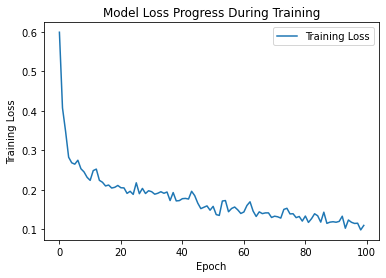

In [49]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

## 7: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [53]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.5616226623761651

In [ ]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [58]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth = 10)
RandomForest_model.fit(X_train, y_train)

<ipython-input-58-d84f52abbfec>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [59]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.752819921074695

## 8: UNDERSTAND VARIOUS REGRESSION KPIs

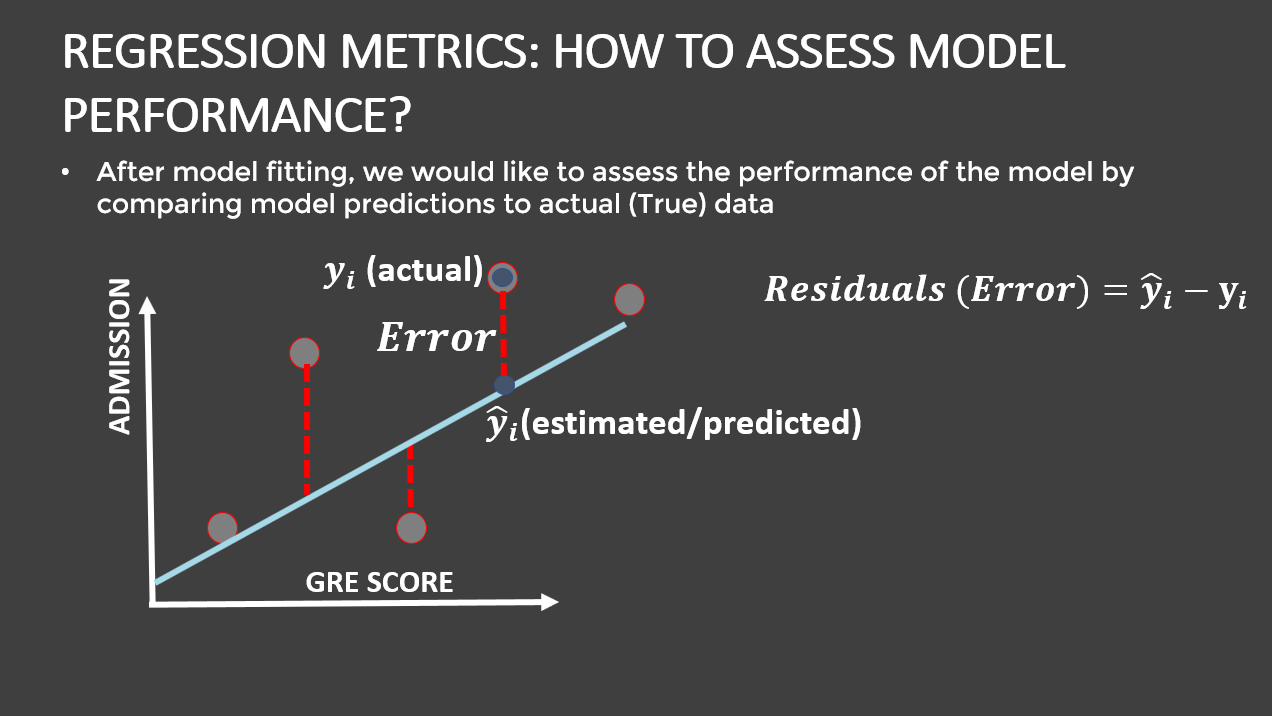

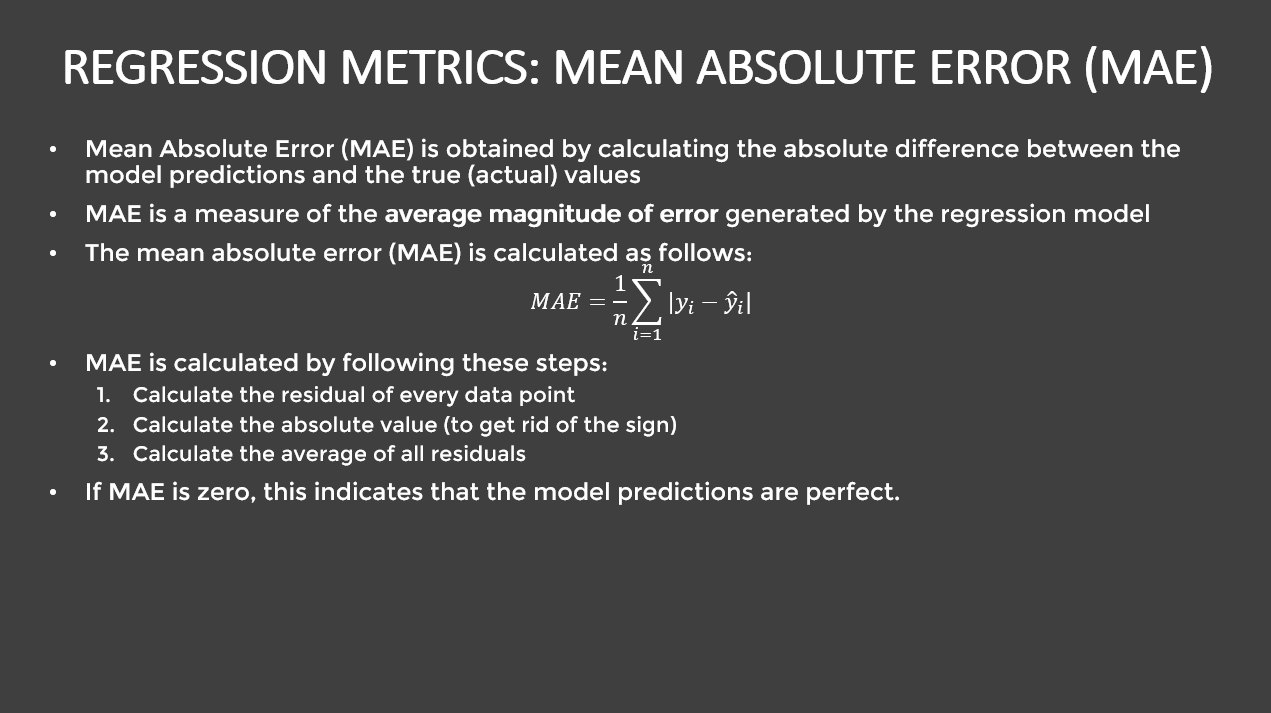

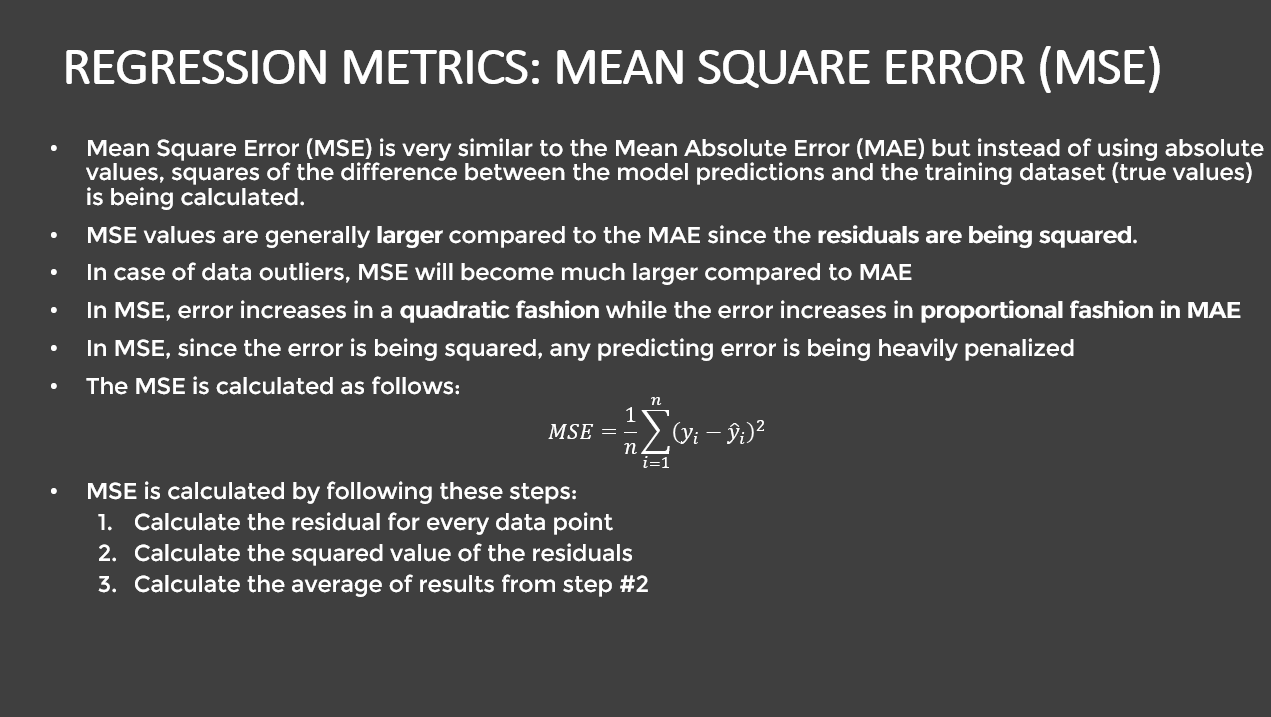

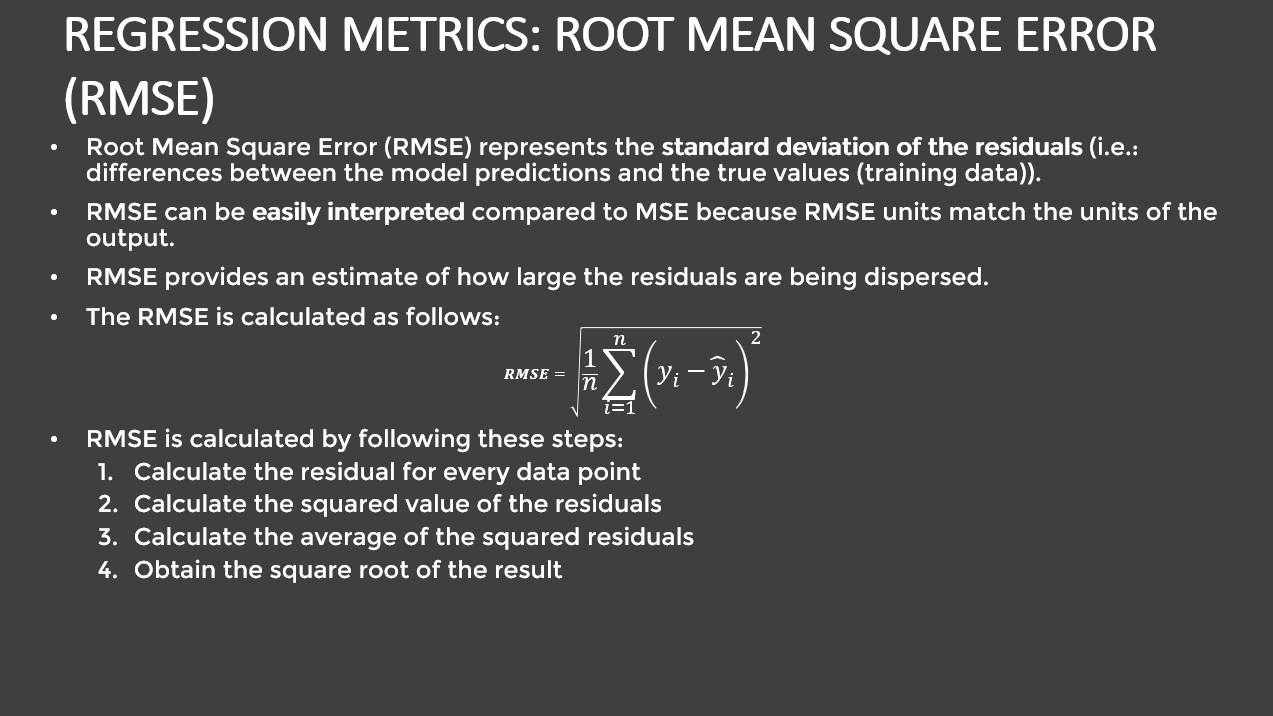

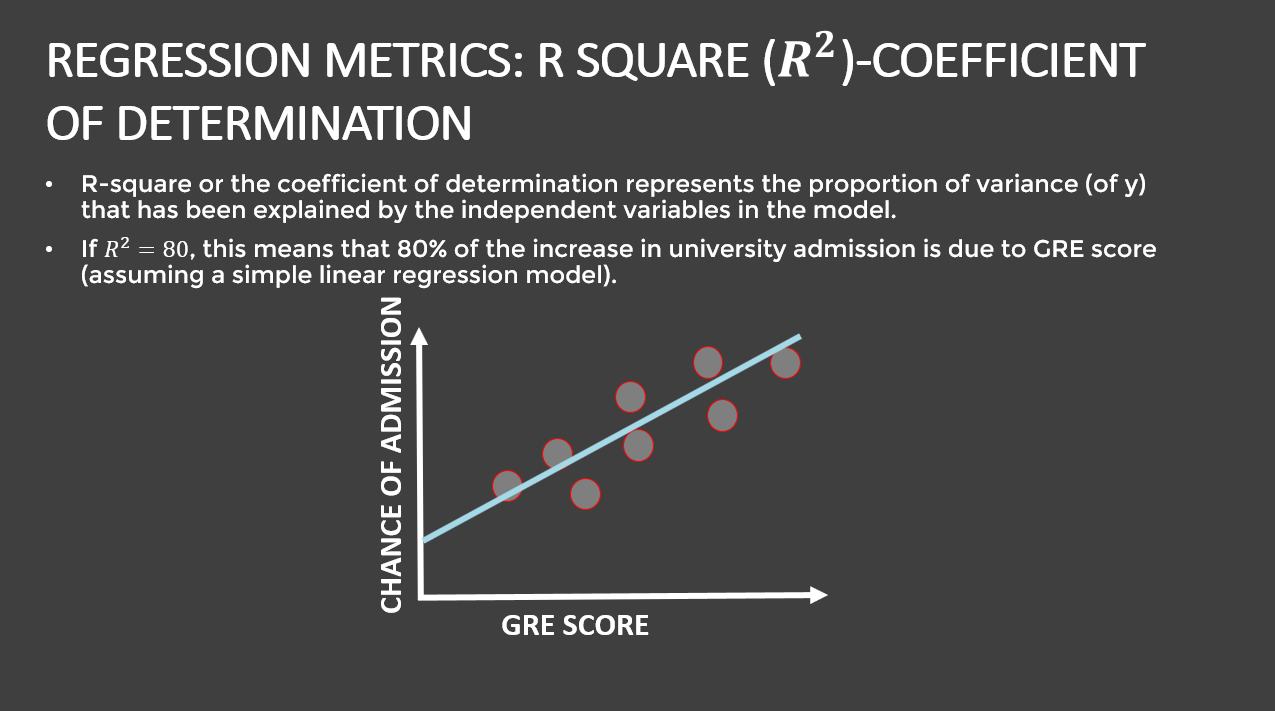

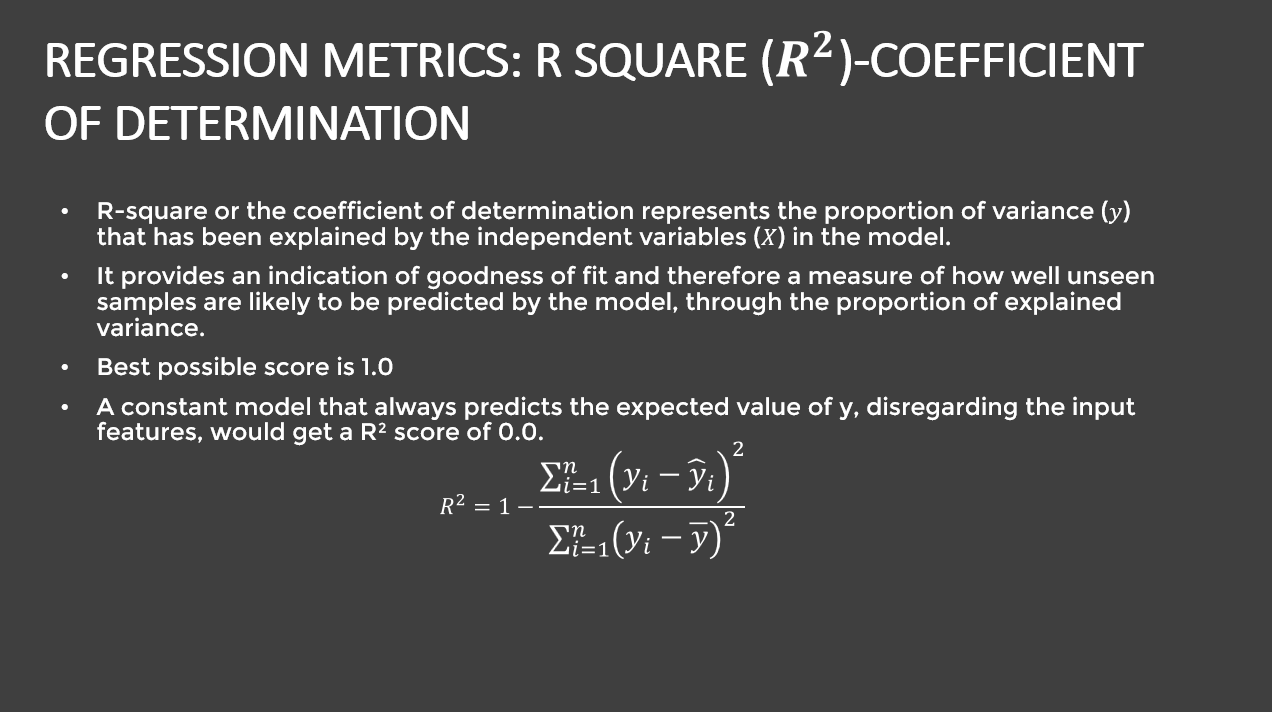

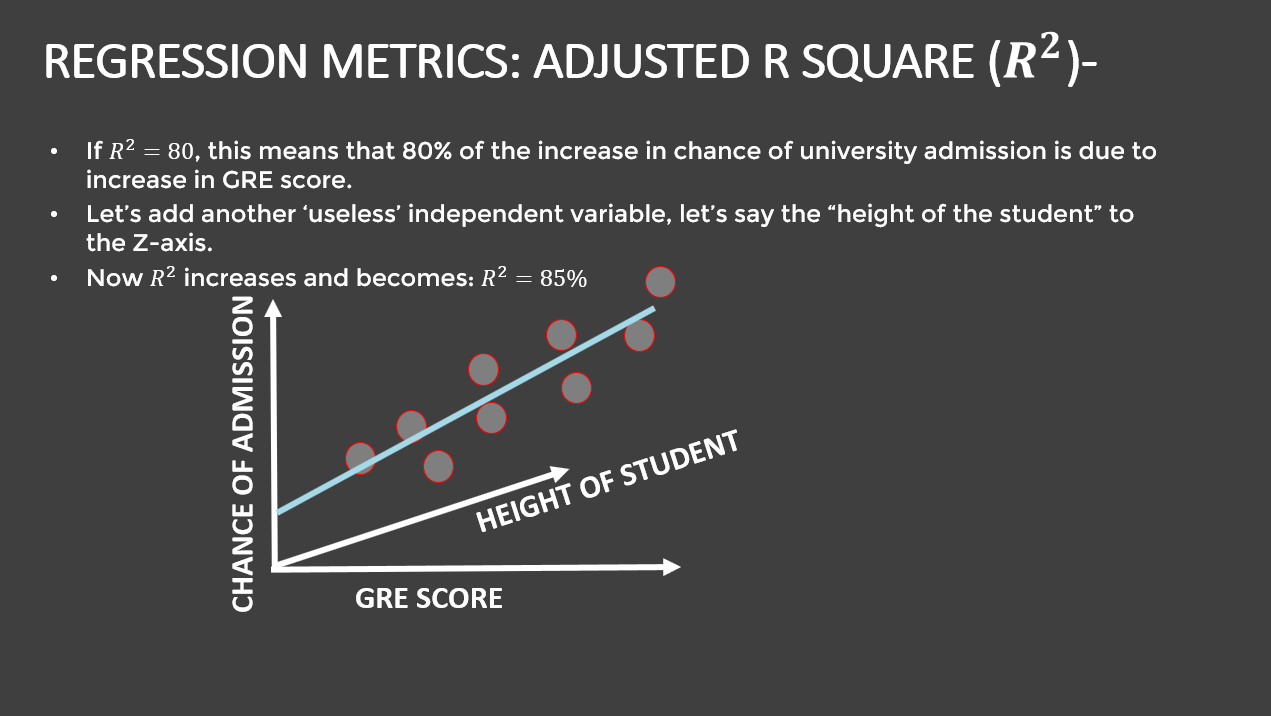

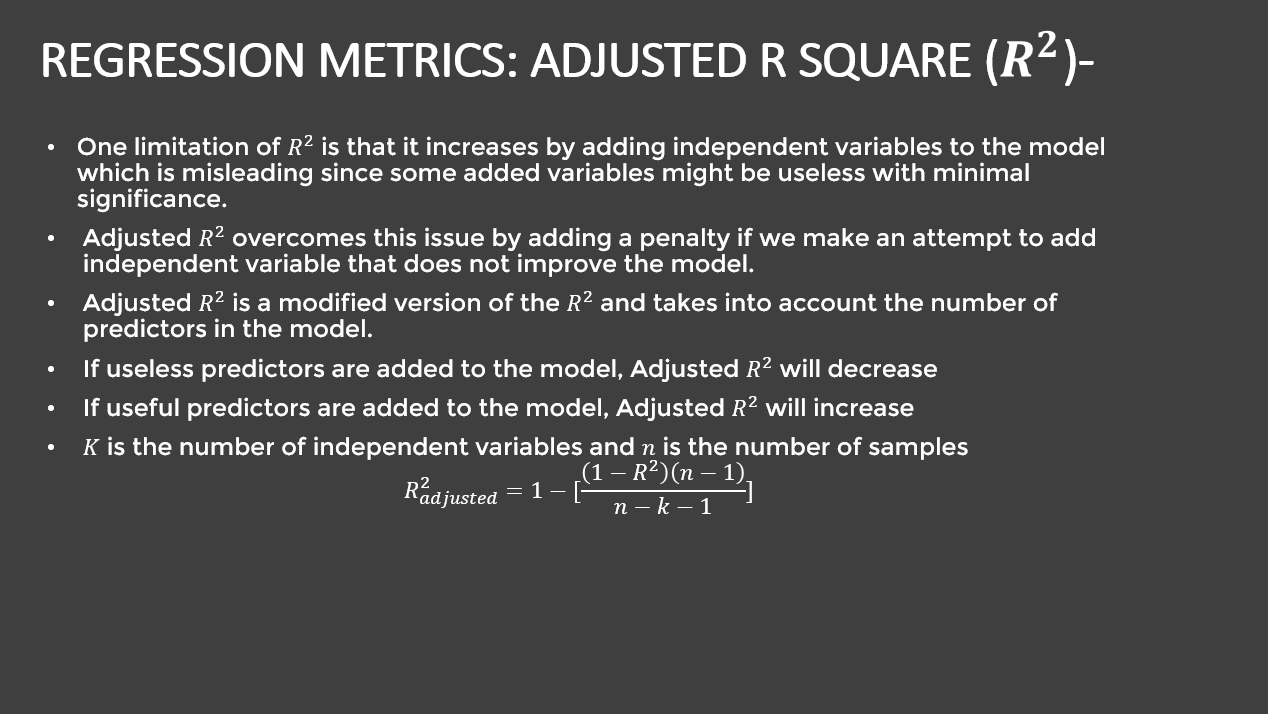

## 9: CALCULATE REGRESSION MODEL KPIs

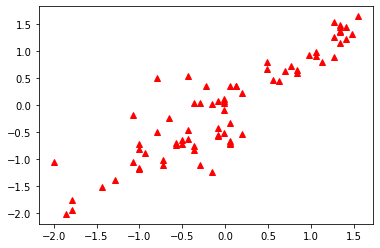

In [60]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'r')

In [61]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

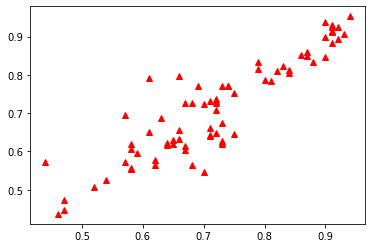

In [67]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [65]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [66]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.057 
MSE = 0.0032666218189135966 
MAE = 0.04155201155403992 
R2 = 0.795970795592809 
Adjusted R2 = 0.7746543115502666
